<a href="https://colab.research.google.com/github/115ayush/CCPSproj/blob/main/12240350_AyushPatel_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">


##  
## **Lab Assignment-4**

## **Ayush Patel**
## **12240350**

</div>

---

<div align="center">



</div>


## Multilabel Classification

\begin{align*}
&\textbf{Model Description:} \text{ For each label } (k), \text{ a separate binary logistic regression model is trained.} \\
&\text{The probability of each label } (k) \text{ being relevant is given by:} \\[10pt]
&P(y_k = 1 \mid X) = \frac{1}{1 + e^{-(\beta_k^T X)}} \\[10pt]
&\text{where } (\beta_k) \text{ are the coefficients for the } (k)\text{-th label.} \\[15pt]
&\textbf{Objective:} \text{ Minimize the binary cross-entropy loss function for each label separately} \\
&\text{and then aggregate the loss:} \\[10pt]
&\text{Loss Function} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} \left[ y_{i,k} \log(\hat{p}_{i,k}) + (1 - y_{i,k}) \log(1 - \hat{p}_{i,k}) \right] \\[10pt]
&\text{where:} \\
&\bullet\; (y_{i,k}) \text{ indicates whether label } (k) \text{ is present for the } (i)\text{-th instance.} \\
&\bullet\; (\hat{p}_{i,k}) \text{ is the predicted probability for label } (k).
\end{align*}

# Confusion Matrix

A confusion matrix is a fundamental evaluation tool for classification models in machine learning. It presents a tabular view of predicted vs. actual class outcomes, revealing model performance across different categories.

## Structure (Binary Classification)

|               | Predicted Positive | Predicted Negative |
|---------------|:------------------:|:------------------:|
| Actual Positive |        TP         |         FN        |
| Actual Negative |        FP         |         TN        |

Where:
- TP: True Positive
- FN: False Negative
- FP: False Positive
- TN: True Negative

## Key Metrics

1. Accuracy = (TP + TN) / (TP + TN + FP + FN)
2. Precision = TP / (TP + FP)
3. Recall = TP / (TP + FN)
4. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

## Multi-class Extension

For K classes, the matrix expands to K x K. Class-specific metrics can be aggregated using macro or micro averaging:

- Macro-F1 = (1/K) * Σ(F1_k) for k = 1 to K
- Micro-F1 = calculated using summed TP, FP, FN across all classes

These metrics offer insights into model behavior, highlighting areas for improvement in classification tasks.

### Q. Perform multilabel classification on Yeast dataset. You can get the dataset using sklearn. Submit the ipynb file on the canvas portal.

#Importing necessary libraries for data manipulation, visualization, and machine learning
# NumPy for numerical operations, Pandas for data handling, Matplotlib and Seaborn for plotting
# Scikit-learn for machine learning models, metrics, and data preprocessing
# Loading the Yeast dataset from OpenML for multi-label classification

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
yeast = fetch_openml(name='yeast', version=4, as_frame=True)
X = yeast.data
y = yeast.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [26]:
# Getting the shape of the Yeast dataset
print("Dataset shape (X):", X.shape)
print("Target shape (y):", y.shape)

Dataset shape (X): (2417, 103)
Target shape (y): (2417, 14)


In [27]:


#looking the training set description
X.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


# Data Preprocessing and Set Splitting
# This section performs feature scaling on the dataset using Min-Max normalization.
# It then divides the data into training and testing sets, with 80% for training
# and 20% for testing. The shapes of resulting sets are displayed to verify
# the split operation.

In [28]:
# Feature scaling using Min-Max normalization
X_scaled = (X - X.min()) / (X.max() - X.min())

# Partitioning data into training and testing sets 20%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set labels shape:", y_train.shape)
print("Testing set labels shape:", y_test.shape)

Training set features shape: (1933, 103)
Testing set features shape: (484, 103)
Training set labels shape: (1933, 14)
Testing set labels shape: (484, 14)


# Model Training and Prediction
# This section implements a multi-label classification model using logistic regression.
# The model is trained on the training data and then used to make predictions
# on the test set. The shape of the predictions array is displayed to ensure
# it matches the expected output dimensions.

In [29]:
# Initialize multi-label classifier
multi_label_model = MultiOutputClassifier(LogisticRegression(max_iter=1000))

# Train the model
multi_label_model.fit(X_train, y_train)

# Generate predictions
y_predictions = multi_label_model.predict(X_test)

print("Shape of predictions:", y_predictions.shape)

Shape of predictions: (484, 14)


# Performance Evaluation
# This section calculates and displays the accuracy for each individual label
# in the multi-label classification task. It compares the true values from
# the test set with the model's predictions for each class separately.

In [30]:

print("Label-wise Classification Accuracy:")
for idx, target_class in enumerate(y_train.columns):
    label_accuracy = accuracy_score(y_test.iloc[:, idx], y_predictions[:, idx])
    print(f"{target_class:<15} : {label_accuracy:.4f}")


Label-wise Classification Accuracy:
Class1          : 0.7769
Class2          : 0.6508
Class3          : 0.7293
Class4          : 0.7397
Class5          : 0.7479
Class6          : 0.7583
Class7          : 0.8409
Class8          : 0.8264
Class9          : 0.9380
Class10         : 0.8864
Class11         : 0.8719
Class12         : 0.7603
Class13         : 0.7562
Class14         : 0.9855


# Confusion Matrix Analysis
# This section computes and visualizes confusion matrices for each label
# in the multi-label classification task. It provides both numerical
# confusion matrices and graphical representations to aid in understanding
# the model's performance across different classes.


Confusion Matrix - Class1:
[[298  19]
 [ 89  78]]


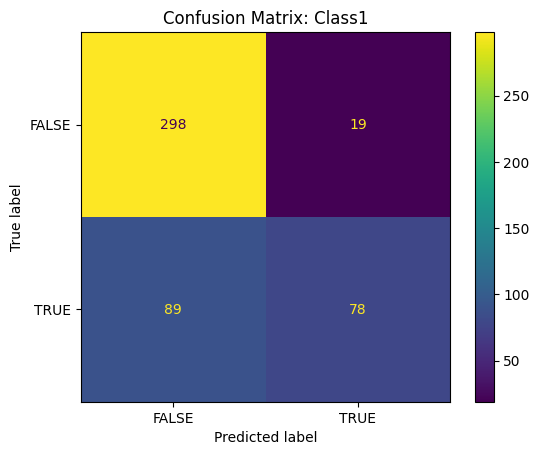


Classification Report - Class1:
              precision    recall  f1-score   support

       FALSE       0.77      0.94      0.85       317
        TRUE       0.80      0.47      0.59       167

    accuracy                           0.78       484
   macro avg       0.79      0.70      0.72       484
weighted avg       0.78      0.78      0.76       484


Confusion Matrix - Class2:
[[211  62]
 [107 104]]


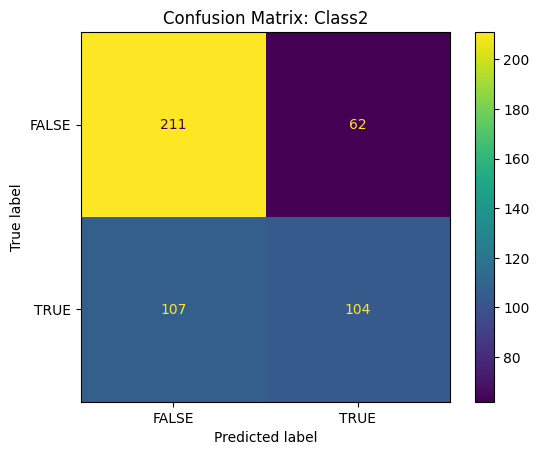


Classification Report - Class2:
              precision    recall  f1-score   support

       FALSE       0.66      0.77      0.71       273
        TRUE       0.63      0.49      0.55       211

    accuracy                           0.65       484
   macro avg       0.65      0.63      0.63       484
weighted avg       0.65      0.65      0.64       484


Confusion Matrix - Class3:
[[227  61]
 [ 70 126]]


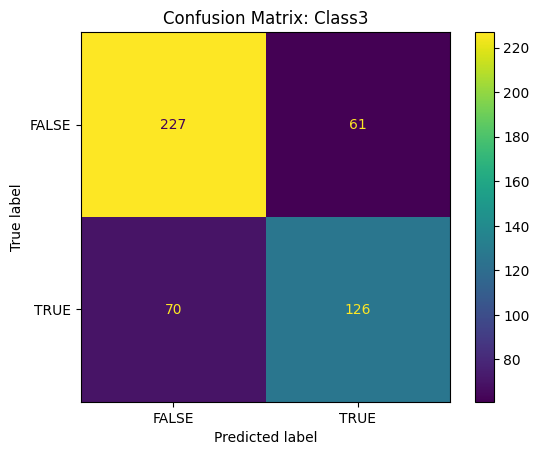


Classification Report - Class3:
              precision    recall  f1-score   support

       FALSE       0.76      0.79      0.78       288
        TRUE       0.67      0.64      0.66       196

    accuracy                           0.73       484
   macro avg       0.72      0.72      0.72       484
weighted avg       0.73      0.73      0.73       484


Confusion Matrix - Class4:
[[266  47]
 [ 79  92]]


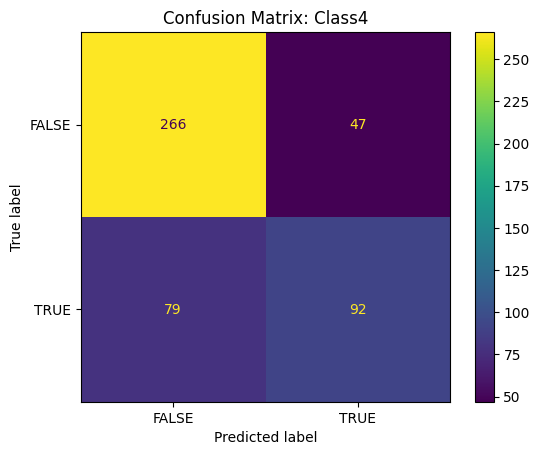


Classification Report - Class4:
              precision    recall  f1-score   support

       FALSE       0.77      0.85      0.81       313
        TRUE       0.66      0.54      0.59       171

    accuracy                           0.74       484
   macro avg       0.72      0.69      0.70       484
weighted avg       0.73      0.74      0.73       484


Confusion Matrix - Class5:
[[310  30]
 [ 92  52]]


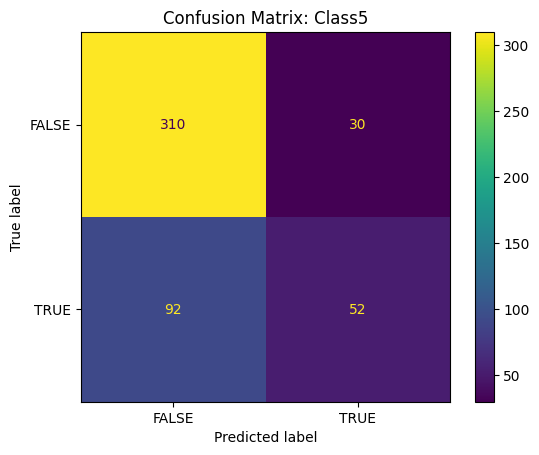


Classification Report - Class5:
              precision    recall  f1-score   support

       FALSE       0.77      0.91      0.84       340
        TRUE       0.63      0.36      0.46       144

    accuracy                           0.75       484
   macro avg       0.70      0.64      0.65       484
weighted avg       0.73      0.75      0.72       484


Confusion Matrix - Class6:
[[346  11]
 [106  21]]


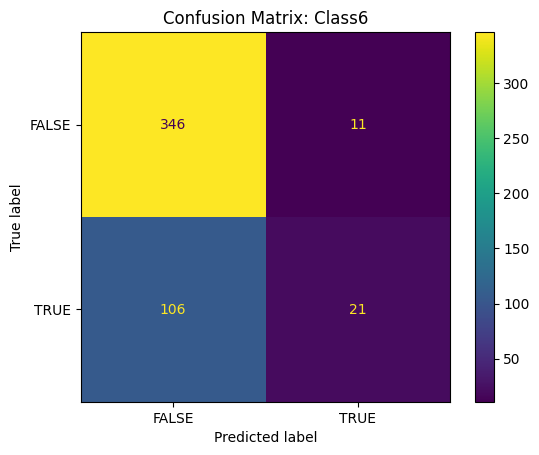


Classification Report - Class6:
              precision    recall  f1-score   support

       FALSE       0.77      0.97      0.86       357
        TRUE       0.66      0.17      0.26       127

    accuracy                           0.76       484
   macro avg       0.71      0.57      0.56       484
weighted avg       0.74      0.76      0.70       484


Confusion Matrix - Class7:
[[403   5]
 [ 72   4]]


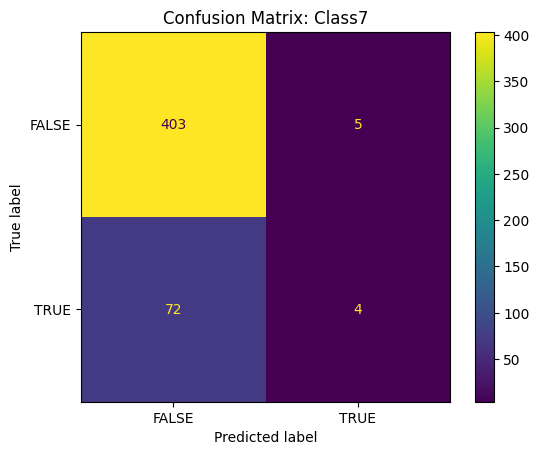


Classification Report - Class7:
              precision    recall  f1-score   support

       FALSE       0.85      0.99      0.91       408
        TRUE       0.44      0.05      0.09        76

    accuracy                           0.84       484
   macro avg       0.65      0.52      0.50       484
weighted avg       0.78      0.84      0.78       484


Confusion Matrix - Class8:
[[395   6]
 [ 78   5]]


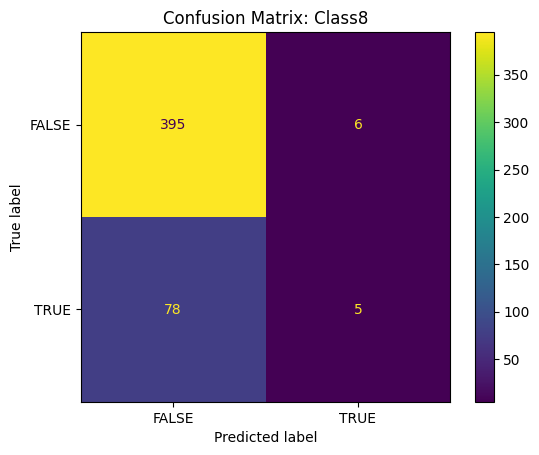


Classification Report - Class8:
              precision    recall  f1-score   support

       FALSE       0.84      0.99      0.90       401
        TRUE       0.45      0.06      0.11        83

    accuracy                           0.83       484
   macro avg       0.64      0.52      0.51       484
weighted avg       0.77      0.83      0.77       484


Confusion Matrix - Class9:
[[454   0]
 [ 30   0]]


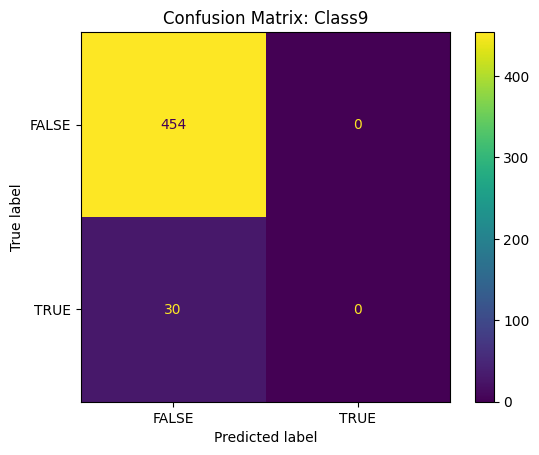


Classification Report - Class9:
              precision    recall  f1-score   support

       FALSE       0.94      1.00      0.97       454
        TRUE       1.00      0.00      0.00        30

    accuracy                           0.94       484
   macro avg       0.97      0.50      0.48       484
weighted avg       0.94      0.94      0.91       484


Confusion Matrix - Class10:
[[428   1]
 [ 54   1]]


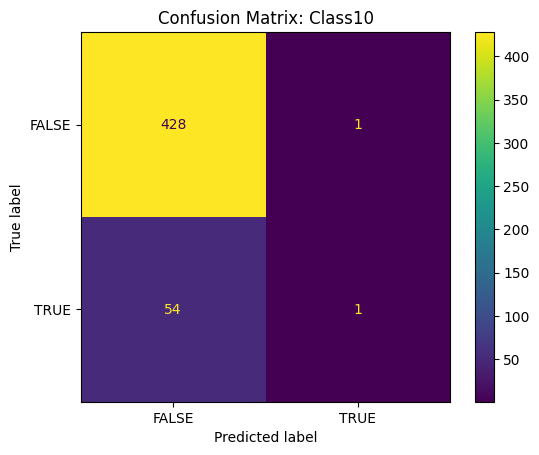


Classification Report - Class10:
              precision    recall  f1-score   support

       FALSE       0.89      1.00      0.94       429
        TRUE       0.50      0.02      0.04        55

    accuracy                           0.89       484
   macro avg       0.69      0.51      0.49       484
weighted avg       0.84      0.89      0.84       484


Confusion Matrix - Class11:
[[421   1]
 [ 61   1]]


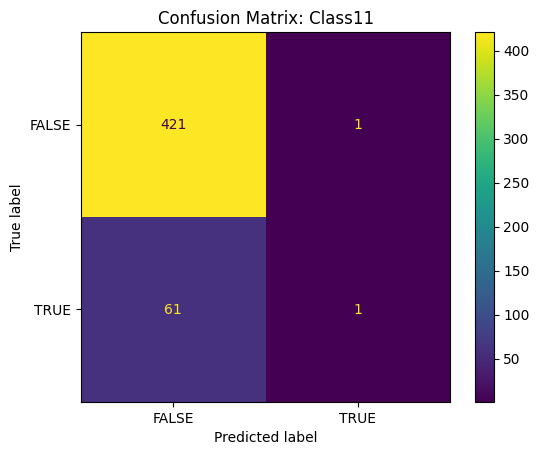


Classification Report - Class11:
              precision    recall  f1-score   support

       FALSE       0.87      1.00      0.93       422
        TRUE       0.50      0.02      0.03        62

    accuracy                           0.87       484
   macro avg       0.69      0.51      0.48       484
weighted avg       0.83      0.87      0.82       484


Confusion Matrix - Class12:
[[  9 109]
 [  7 359]]


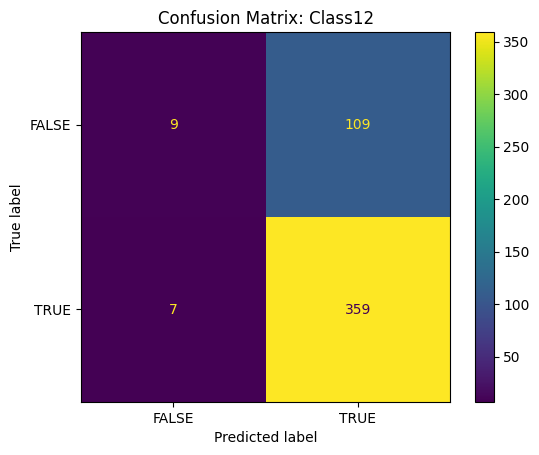


Classification Report - Class12:
              precision    recall  f1-score   support

       FALSE       0.56      0.08      0.13       118
        TRUE       0.77      0.98      0.86       366

    accuracy                           0.76       484
   macro avg       0.66      0.53      0.50       484
weighted avg       0.72      0.76      0.68       484


Confusion Matrix - Class13:
[[  8 111]
 [  7 358]]


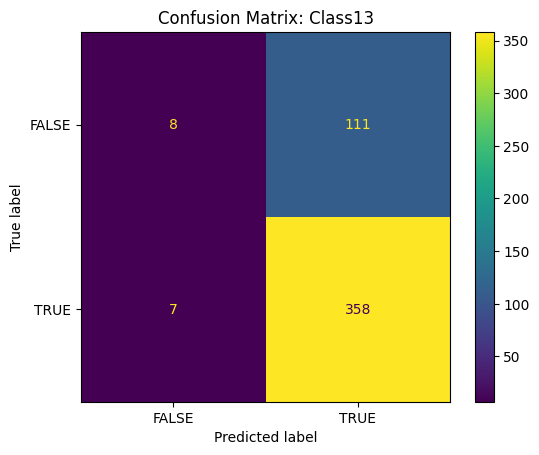


Classification Report - Class13:
              precision    recall  f1-score   support

       FALSE       0.53      0.07      0.12       119
        TRUE       0.76      0.98      0.86       365

    accuracy                           0.76       484
   macro avg       0.65      0.52      0.49       484
weighted avg       0.71      0.76      0.68       484


Confusion Matrix - Class14:
[[477   0]
 [  7   0]]


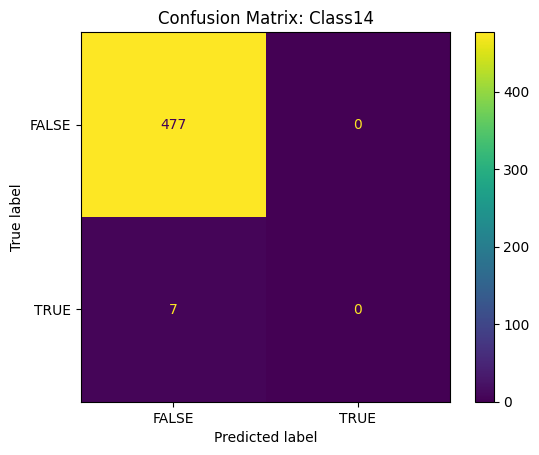


Classification Report - Class14:
              precision    recall  f1-score   support

       FALSE       0.99      1.00      0.99       477
        TRUE       1.00      0.00      0.00         7

    accuracy                           0.99       484
   macro avg       0.99      0.50      0.50       484
weighted avg       0.99      0.99      0.98       484



In [31]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Convert DataFrame to numpy array if it's not already
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_array = y_predictions

# Generate and visualize confusion matrices for each label
for idx, target_class in enumerate(y_train.columns):
    # Extract the relevant column for this class
    y_test_class = y_test_array[:, idx]
    y_pred_class = y_pred_array[:, idx]

    # Compute the confusion matrix
    cm = confusion_matrix(y_test_class, y_pred_class)

    print(f"\nConfusion Matrix - {target_class}:")
    print(cm)

    # Create and display the confusion matrix visualization
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=np.unique(np.concatenate((y_test_class, y_pred_class)))
    )
    cm_display.plot(cmap="viridis")
    plt.title(f"Confusion Matrix: {target_class}")
    plt.show()

    # Print classification report for this class with zero_division to handle undefined metrics
    print(f"\nClassification Report - {target_class}:")
    print(classification_report(y_test_class, y_pred_class, zero_division=1))  # Handling division by zero


<center>END OF ASSIGNMENT  </center>